In [1]:
pip install pyspark


     |████████████████████████████████| 212.4MB 70kB/s 
     |████████████████████████████████| 204kB 18.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=85544fd004ed82c939256748d2fc99b81a77b1b02b54430fb68ed00d55509103
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession, Row
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')


In [3]:
sc = SparkContext()
spark = SparkSession.builder.appName('google_play_store').getOrCreate()

In [4]:
df = spark.read.csv('Google-Playstore.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- App Name: string (nullable = true)
 |-- App Id: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Rating Count: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Minimum Installs: string (nullable = true)
 |-- Maximum Installs: string (nullable = true)
 |-- Free: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Minimum Android: string (nullable = true)
 |-- Developer Id: string (nullable = true)
 |-- Developer Website: string (nullable = true)
 |-- Developer Email: string (nullable = true)
 |-- Released: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Privacy Policy: string (nullable = true)
 |-- Ad Supported: string (nullable = true)
 |-- In App Purchases: string (nullable = true)
 |-- Editors Choice: boolean (nullable = true)
 |-- Scr

In [5]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
App Name,Gakondo,Ampere Battery Info,Vibook,Smart City Trichy Public Service Vehicles 17UC...,GROW.me
App Id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.doantiepvien.crm,cst.stJoseph.ug17ucs548,com.horodyski.grower
Category,Adventure,Tools,Productivity,Communication,Tools
Rating,0,4.4,0,5,0
Rating Count,0,64,0,5,0
Installs,10+,"5,000+",50+,10+,100+
Minimum Installs,10,5000,50,10,100
Maximum Installs,15,7662,58,19,478
Free,TRUE,TRUE,TRUE,TRUE,TRUE
Price,0,0,0,0,0


In [6]:
dT = df.drop("Developer Email")

In [7]:
dT.show

<bound method DataFrame.show of DataFrame[App Name: string, App Id: string, Category: string, Rating: string, Rating Count: string, Installs: string, Minimum Installs: string, Maximum Installs: string, Free: string, Price: string, Currency: string, Size: string, Minimum Android: string, Developer Id: string, Developer Website: string, Released: string, Last Updated: string, Content Rating: string, Privacy Policy: string, Ad Supported: string, In App Purchases: string, Editors Choice: boolean, Scraped Time: string]>

In [8]:
import pandas as pd
pd.DataFrame(dT.take(5), columns=dT.columns).transpose()

,0,1,2,3,4
App Name,Gakondo,Ampere Battery Info,Vibook,Smart City Trichy Public Service Vehicles 17UC...,GROW.me
App Id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.doantiepvien.crm,cst.stJoseph.ug17ucs548,com.horodyski.grower
Category,Adventure,Tools,Productivity,Communication,Tools
Rating,0,4.4,0,5,0
Rating Count,0,64,0,5,0
Installs,10+,"5,000+",50+,10+,100+
Minimum Installs,10,5000,50,10,100
Maximum Installs,15,7662,58,19,478
Free,TRUE,TRUE,TRUE,TRUE,TRUE
Price,0,0,0,0,0


In [9]:
spark

In [10]:
ggle = spark.read.csv('Google-Playstore.csv', header=True)

In [11]:
ggle.columns

['App Name',
 'App Id',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Maximum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Minimum Android',
 'Developer Id',
 'Developer Website',
 'Developer Email',
 'Released',
 'Last Updated',
 'Content Rating',
 'Privacy Policy',
 'Ad Supported',
 'In App Purchases',
 'Editors Choice',
 'Scraped Time']

In [12]:
ggle = ggle.withColumn("Rating", ggle.Rating.cast('float'))
ggle = ggle.withColumn("Rating Count", ggle['Rating Count'].cast('float'))
ggle = ggle.withColumn("Minimum Installs", ggle['Minimum Installs'].cast('float'))
ggle = ggle.withColumn("Maximum Installs", ggle['Maximum Installs'].cast('float'))
ggle = ggle.withColumn("Price", ggle.Price.cast('float'))
ggle = ggle.withColumn("Free", ggle.Rating.cast('boolean'))
ggle = ggle.withColumn("Ad Supported", ggle['Ad Supported'].cast('boolean'))
ggle = ggle.withColumn("In App Purchases", ggle['In App Purchases'].cast('boolean'))
ggle = ggle.withColumn("Editors Choice", ggle['Editors Choice'].cast('boolean'))


In [13]:
to_drp= (
    'App Id', 'Minimum Android', 
    'Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy', 
    'Ad Supported', 'In App Purchases', 'Editors Choice','Scraped Time','Free'
)
ggle = ggle.drop(*to_drp)


In [14]:
ggle.show(10)

+--------------------+----------------+------+------------+--------+----------------+----------------+-----+--------+----+------------+------------+--------------+
|            App Name|        Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs|Price|Currency|Size|    Released|Last Updated|Content Rating|
+--------------------+----------------+------+------------+--------+----------------+----------------+-----+--------+----+------------+------------+--------------+
|             Gakondo|       Adventure|   0.0|         0.0|     10+|            10.0|            15.0|  0.0|     USD| 10M|Feb 26, 2020|Feb 26, 2020|      Everyone|
| Ampere Battery Info|           Tools|   4.4|        64.0|  5,000+|          5000.0|          7662.0|  0.0|     USD|2.9M|May 21, 2020|May 06, 2021|      Everyone|
|              Vibook|    Productivity|   0.0|         0.0|     50+|            50.0|            58.0|  0.0|     USD|3.7M| Aug 9, 2019|Aug 19, 2019|      Everyone|
|Smart City Tric

In [15]:
ggle.printSchema()

root
 |-- App Name: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Rating Count: float (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Minimum Installs: float (nullable = true)
 |-- Maximum Installs: float (nullable = true)
 |-- Price: float (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Released: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Content Rating: string (nullable = true)



In [16]:
top_8_list = [
    'Education', 'Music', 'Business', 'Tools', 
    'Entertainment', 'Lifestyle', 'Food & Drink', 
    'Books & Reference'
]

top = ggle[ggle['category'].isin(top_8_list)]



In [17]:
top.show()

+--------------------+-----------------+------+------------+--------+----------------+----------------+-----+--------+----+------------+------------+--------------+
|            App Name|         Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs|Price|Currency|Size|    Released|Last Updated|Content Rating|
+--------------------+-----------------+------+------------+--------+----------------+----------------+-----+--------+----+------------+------------+--------------+
| Ampere Battery Info|            Tools|   4.4|        64.0|  5,000+|          5000.0|          7662.0|  0.0|     USD|2.9M|May 21, 2020|May 06, 2021|      Everyone|
|             GROW.me|            Tools|   0.0|         0.0|    100+|           100.0|           478.0|  0.0|     USD|6.2M|Feb 21, 2020|Nov 12, 2018|      Everyone|
|The Everyday Cale...|        Lifestyle|   2.0|        39.0|    500+|           500.0|           702.0|  0.0|     USD| 16M|Jun 21, 2019|Jun 21, 2019|      Everyone|
|Readymade

In [18]:
ggle_df= top.toPandas()

In [19]:
ggle_df

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Released,Last Updated,Content Rating
0,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662.0,0.0,USD,2.9M,"May 21, 2020","May 06, 2021",Everyone
1,GROW.me,Tools,0.0,0.0,100+,100.0,478.0,0.0,USD,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone
2,The Everyday Calendar,Lifestyle,2.0,39.0,500+,500.0,702.0,0.0,USD,16M,"Jun 21, 2019","Jun 21, 2019",Everyone
3,Readymade Grocery App,Food & Drink,4.2,16.0,"1,000+",1000.0,4313.0,0.0,USD,12M,"Apr 5, 2020","Mar 23, 2021",Everyone
4,All in one shopping app,Tools,5.0,6.0,50+,50.0,62.0,0.0,USD,2.0M,"Apr 24, 2019","May 05, 2019",Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441255,وجبات سريعة التحضير,Books & Reference,3.0,6.0,"1,000+",1000.0,1008.0,0.0,USD,3.3M,"Sep 2, 2015","Oct 23, 2018",Everyone
441256,All Electrical Formula & Electrical Calculations,Education,3.9,30.0,"5,000+",5000.0,7455.0,0.0,USD,8.0M,"Sep 26, 2020","Jan 27, 2021",Everyone
441257,La Ribambelle De Melkart,Education,4.8,24.0,100+,100.0,314.0,0.0,USD,4.2M,"Sep 23, 2015","Feb 17, 2019",Everyone
441258,MAFAB - Filmek adatbázisa,Entertainment,3.4,61.0,"5,000+",5000.0,9851.0,0.0,USD,1.1M,"Aug 17, 2015","May 10, 2019",Everyone


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

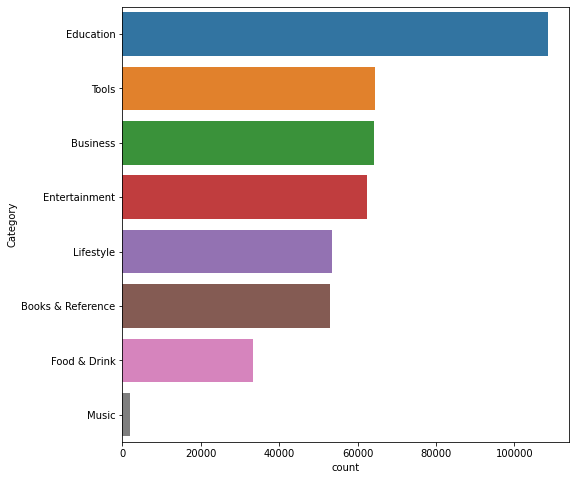

In [21]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
order = ggle_df.Category.value_counts().index
sns.countplot(y=ggle_df.Category, ax=ax, orient='h', order=order)

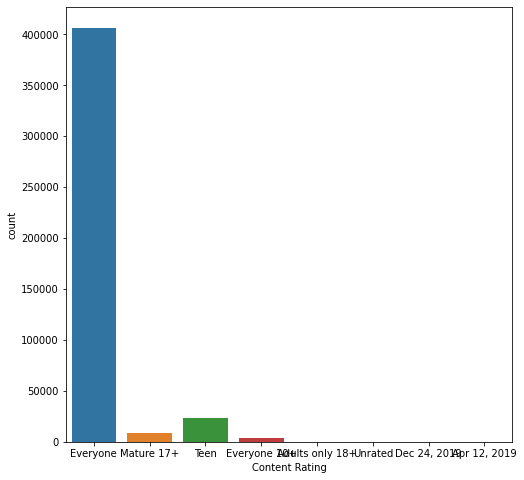

In [22]:
ig_dims = (8, 8)
ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=ggle_df, x='Content Rating')

([<matplotlib.patches.Wedge at 0x7f168e715550>,
 [Text(-0.7677803272124404, 0.7877267096814466, 'Education'),
  Text(-0.998360723318168, -0.4618180010952633, 'Tools'),
  Text(-0.24096473797299797, -1.073282812241771, 'Business'),
  Text(0.692426943532901, -0.8547192099570974, 'Entertainment'),
  Text(1.0977053353643356, -0.07101405996471198, 'Lifestyle'),
  Text(0.8459108302786918, 0.7031606268963119, 'Books & Reference'),
  Text(0.28680584526543984, 1.0619521680007893, 'Food & Drink'),
  Text(0.014863774307866161, 1.099899571876144, 'Music')],
 [Text(-0.4187892693886038, 0.42966911437169814, '24.59%'),
  Text(-0.5445603945371825, -0.25190072787014356, '14.61%'),
  Text(-0.13143531162163524, -0.5854269884955114, '14.57%'),
  Text(0.37768742374521874, -0.4662104781584167, '14.13%'),
  Text(0.5987483647441829, -0.0387349417989338, '12.14%'),
  Text(0.46140590742474097, 0.383542160125261, '11.99%'),
  Text(0.1564395519629672, 0.5792466370913396, '7.54%'),
  Text(0.008107513258836086, 0.59

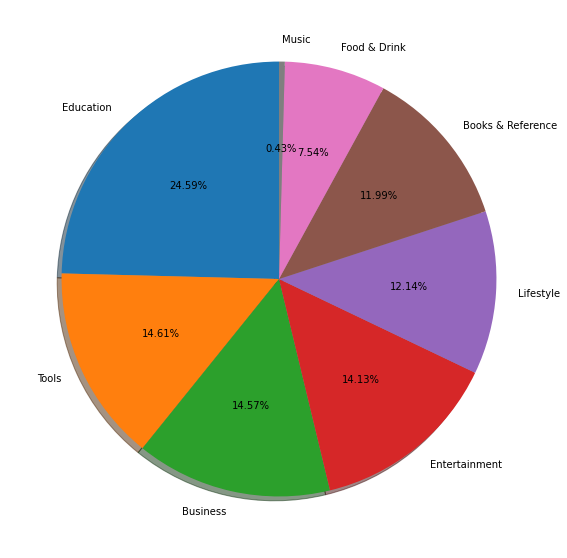

In [23]:
fig_dims = (10, 10)
ax = plt.subplots(figsize=fig_dims)
labels = ggle_df['Category'].value_counts(sort=True).index
types = ggle_df['Category'].value_counts(sort = True)
plt.pie(types, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
# plt.legend()

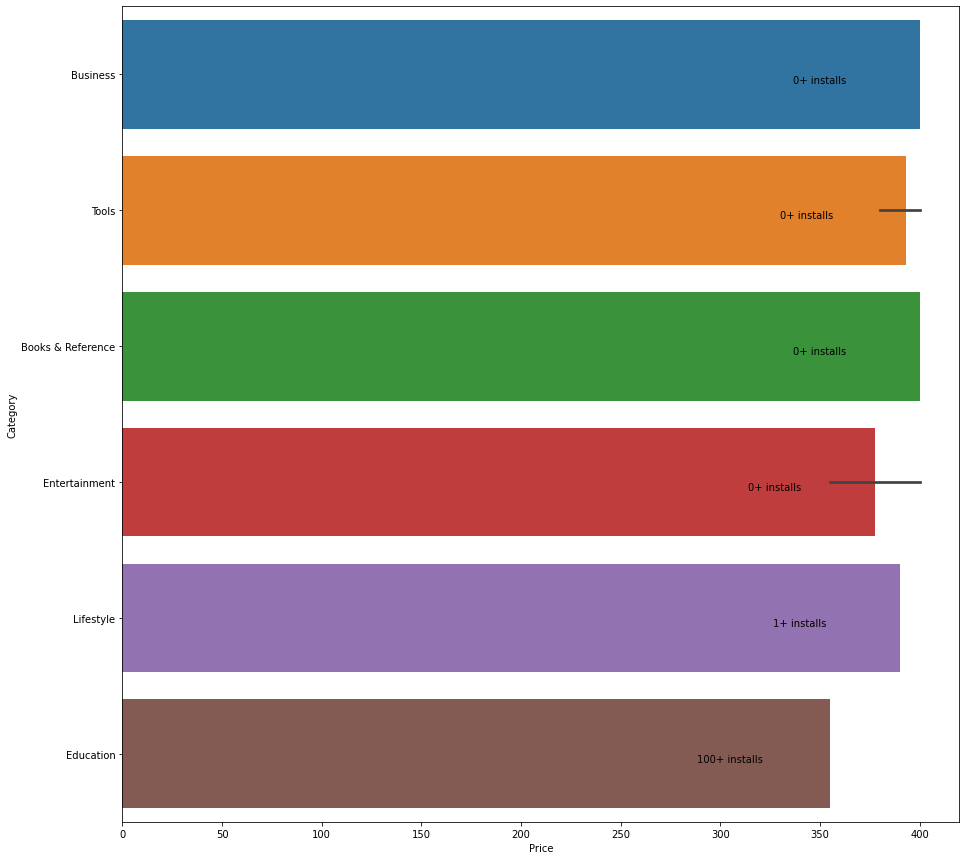

In [24]:
fig_dims = (15, 15)
ax = plt.subplots(figsize=fig_dims)
expensive_apps = ggle_df.sort_values(by='Price', ascending=False).head(10)
splot = sns.barplot(data=expensive_apps, y='Category', x='Price', orient='h')
for (p, installs) in zip(splot.patches, expensive_apps['Installs']):
    width = p.get_width()
    splot.text(p.get_width()-50, p.get_y()+0.55*p.get_height(),
             s=f'{installs} installs' ,
             ha='center', va='center') 
    


    

In [1]:
plt.figure(figsize=(30,15))
sns.countplot(train_data['Minimum Android'])
plt.plot()

NameError: ignored

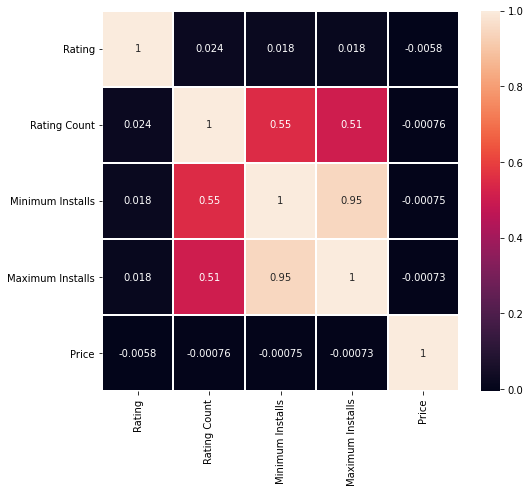

In [25]:
df_corr = ggle_df.corr()

plt.subplots(figsize=(8,7))
sns.heatmap(df_corr, annot=True, linewidths=1, cbar=True)

In [26]:
ggle_df

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Released,Last Updated,Content Rating
0,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662.0,0.0,USD,2.9M,"May 21, 2020","May 06, 2021",Everyone
1,GROW.me,Tools,0.0,0.0,100+,100.0,478.0,0.0,USD,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone
2,The Everyday Calendar,Lifestyle,2.0,39.0,500+,500.0,702.0,0.0,USD,16M,"Jun 21, 2019","Jun 21, 2019",Everyone
3,Readymade Grocery App,Food & Drink,4.2,16.0,"1,000+",1000.0,4313.0,0.0,USD,12M,"Apr 5, 2020","Mar 23, 2021",Everyone
4,All in one shopping app,Tools,5.0,6.0,50+,50.0,62.0,0.0,USD,2.0M,"Apr 24, 2019","May 05, 2019",Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441255,وجبات سريعة التحضير,Books & Reference,3.0,6.0,"1,000+",1000.0,1008.0,0.0,USD,3.3M,"Sep 2, 2015","Oct 23, 2018",Everyone
441256,All Electrical Formula & Electrical Calculations,Education,3.9,30.0,"5,000+",5000.0,7455.0,0.0,USD,8.0M,"Sep 26, 2020","Jan 27, 2021",Everyone
441257,La Ribambelle De Melkart,Education,4.8,24.0,100+,100.0,314.0,0.0,USD,4.2M,"Sep 23, 2015","Feb 17, 2019",Everyone
441258,MAFAB - Filmek adatbázisa,Entertainment,3.4,61.0,"5,000+",5000.0,9851.0,0.0,USD,1.1M,"Aug 17, 2015","May 10, 2019",Everyone


**Machine learnings**

In [27]:
ggle_ml = spark.read.csv('google_playstore_cleaned.csv', header = True, inferSchema = True)
ggle_ml.printSchema()

root
 |-- App Name: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Reviews: double (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Size: double (nullable = true)
 |-- Price: double (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Game_genre: string (nullable = true)



In [28]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression


In [29]:
from pyspark.ml.feature import StringIndexer
output_indexer = StringIndexer(inputCol="Category", outputCol="Category_Index")
content_indexer = StringIndexer(inputCol="Content Rating", outputCol="Content_Rating_Index")
#Fits a model to the input dataset with optional parameters.
ggle_ml_reg = output_indexer.fit(ggle_ml).transform(ggle_ml)
ggle_ml_reg.show()
ggle_ml_reg_1 = content_indexer.fit(ggle_ml_reg).transform(ggle_ml_reg)
ggle_ml_reg_1.show()



+--------------------+----------------+-----------+---------+--------------------+------------------+-----+--------------+----------+--------------+
|            App Name|        Category|     Rating|  Reviews|            Installs|              Size|Price|Content Rating|Game_genre|Category_Index|
+--------------------+----------------+-----------+---------+--------------------+------------------+-----+--------------+----------+--------------+
|DoorDash - Food D...|  FOOD_AND_DRINK|4.548561573| 305034.0|5,000,000 - 10,00...|13.686153337739592|  0.0|      Everyone|      null|          21.0|
|TripAdvisor Hotel...|TRAVEL_AND_LOCAL|4.400671482|1207922.0|100,000,000 - 500...|17.195525291828794|  0.0|      Everyone|      null|          14.0|
|              Peapod|        SHOPPING|3.656329393|   1967.0|   100,000 - 500,000|               1.4|  0.0|      Everyone|      null|          17.0|
|foodpanda - Local...|  FOOD_AND_DRINK|4.107232571| 389154.0|10,000,000 - 50,0...|              16.0|  0.0

In [30]:
from pyspark.ml.feature import OneHotEncoder
onehotencoder = OneHotEncoder(inputCol="Category_Index", outputCol="Category_vec")
ggle_ml_reg_enc = onehotencoder.fit(ggle_ml_reg_1).transform(ggle_ml_reg_1)
ggle_ml_reg_enc.show(truncate=False)
onehotencoder_1= OneHotEncoder(inputCol="Content_Rating_Index", outputCol="Content_Rating_vec")
ggle_ml_reg_hot = onehotencoder_1.fit(ggle_ml_reg_enc).transform(ggle_ml_reg_enc)

ggle_ml_reg_hot.show(truncate=False)



+--------------------------------------------------+----------------+-----------+---------+-------------------------+------------------+-----+--------------+----------+--------------+--------------------+---------------+
|App Name                                          |Category        |Rating     |Reviews  |Installs                 |Size              |Price|Content Rating|Game_genre|Category_Index|Content_Rating_Index|Category_vec   |
+--------------------------------------------------+----------------+-----------+---------+-------------------------+------------------+-----+--------------+----------+--------------+--------------------+---------------+
|DoorDash - Food Delivery                          |FOOD_AND_DRINK  |4.548561573|305034.0 |5,000,000 - 10,000,000   |13.686153337739592|0.0  |Everyone      |null      |21.0          |0.0                 |(32,[21],[1.0])|
|TripAdvisor Hotels Flights Restaurants Attractions|TRAVEL_AND_LOCAL|4.400671482|1207922.0|100,000,000 - 500,000,000

In [31]:
#Input all the features in one vector columncrim
assembler = VectorAssembler(inputCols=[
       'Reviews', 'Size','Price','Category_vec','Content_Rating_vec'
        ], outputCol = 'attributes')

output = assembler.transform(ggle_ml_reg_hot)
#Input vs Output
finalized_data = output.select("attributes","Rating")

finalized_data.show()

+--------------------+-----------+
|          attributes|     Rating|
+--------------------+-----------+
|(40,[0,1,24,35],[...|4.548561573|
|(40,[0,1,17,35],[...|4.400671482|
|(40,[0,1,20,35],[...|3.656329393|
|(40,[0,1,24,35],[...|4.107232571|
|(40,[0,1,2,24,35]...|4.647752285|
|(40,[0,1,24,35],[...| 3.82532239|
|(40,[0,1,17,36],[...|4.267267704|
|(40,[0,1,24,35],[...|4.495084763|
|(40,[0,1,17,35],[...|3.811764717|
|(40,[0,1,24,35],[...|4.545353413|
|(40,[0,1,24,35],[...|4.511622429|
|(40,[0,1,24,35],[...|4.325407505|
|(40,[0,1,9,35],[7...|3.213527918|
|(40,[0,1,24,35],[...|4.160278797|
|(40,[0,1,24,35],[...|4.739675045|
|(40,[0,1,24,35],[...|4.630653858|
|(40,[0,1,24,35],[...|4.374690533|
|(40,[0,1,24,35],[...|4.614589691|
|(40,[0,1,24,35],[...|4.517921925|
|(40,[0,1,24,35],[...|3.909141541|
+--------------------+-----------+
only showing top 20 rows



In [32]:
from pyspark.sql.functions import isnan, when, count, col
ggle_ml.select([count(when(isnan(c), c)).alias(c) for c in ggle_ml.columns]).show()

+--------+--------+------+-------+--------+----+-----+--------------+----------+
|App Name|Category|Rating|Reviews|Installs|Size|Price|Content Rating|Game_genre|
+--------+--------+------+-------+--------+----+-----+--------------+----------+
|       0|       0|     0|      0|       0|   0|    0|             0|         0|
+--------+--------+------+-------+--------+----+-----+--------------+----------+



In [33]:
#Split training and testing data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])


regressor = LinearRegression(featuresCol = 'attributes', labelCol = 'Rating')

#Learn to fit the model from training set
regressor = regressor.fit(train_data)

#To predict the prices on testing set
pred = regressor.evaluate(test_data)

#Predict the model
pred.predictions.show()

+--------------------+-----------+------------------+
|          attributes|     Rating|        prediction|
+--------------------+-----------+------------------+
|(40,[0,1,2,3,35],...|        5.0| 4.349322497025095|
|(40,[0,1,2,3,35],...|        1.0|4.3485681454685485|
|(40,[0,1,2,3,35],...|        5.0| 4.348516427351407|
|(40,[0,1,2,3,35],...|        5.0| 4.348149698884402|
|(40,[0,1,2,3,35],...|        4.0| 4.374771215050214|
|(40,[0,1,2,3,35],...|        4.0|4.3485843384440726|
|(40,[0,1,2,3,35],...|        5.0|   4.3513562078695|
|(40,[0,1,2,3,35],...|        5.0| 4.371390420544685|
|(40,[0,1,2,3,35],...|        5.0| 4.354614461257743|
|(40,[0,1,2,3,35],...|        4.5| 4.349907601297492|
|(40,[0,1,2,3,35],...|        4.5|  4.34978274486263|
|(40,[0,1,2,3,35],...|        5.0| 4.353518977503741|
|(40,[0,1,2,3,35],...|        4.5| 4.367536121150209|
|(40,[0,1,2,3,35],...|4.666666508| 4.349785370483472|
|(40,[0,1,2,3,35],...|4.333333492| 4.354047662011984|
|(40,[0,1,2,3,35],...|3.6666

In [34]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([0.0, -0.0, 0.0013, 0.2327, 0.1594, 0.0274, 0.3615, 0.1419, 0.3172, 0.1821, 0.3168, -0.0692, 0.0243, 0.0537, 0.1153, 0.0988, 0.0496, 0.0247, 0.1659, 0.1149, 0.0839, 0.236, -0.0834, 0.1218, 0.1957, -0.0605, 0.0119, 0.1205, 0.0704, 0.1767, -0.0697, 0.2316, 0.2087, 0.0978, 0.1461, 0.1879, 0.2199, 0.1856, 0.1538, 0.0689])
The Intercept of the model is : 3.926714


In [35]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="Rating", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 0.573
MSE: 0.328
MAE: 0.411
r2: 0.044


In [36]:
from pyspark.ml.regression import DecisionTreeRegressor
# regressor = LinearRegression(featuresCol = 'attributes', labelCol = 'Rating')
dec_tree = DecisionTreeRegressor(featuresCol = 'attributes', labelCol = 'Rating')
dec_tree_model = dec_tree.fit(train_data)


In [37]:
dec_tree_model.featureImportances

SparseVector(40, {0: 0.1276, 1: 0.0428, 2: 0.004, 3: 0.1473, 6: 0.3092, 8: 0.1982, 10: 0.1597, 35: 0.0023, 36: 0.0077, 37: 0.0012})

In [38]:
model_predictions= dec_tree_model.transform(test_data)
model_predictions.show()


+--------------------+-----------+-----------------+
|          attributes|     Rating|       prediction|
+--------------------+-----------+-----------------+
|(40,[0,1,2,3,35],...|        5.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        1.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        5.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        5.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        4.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        4.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        5.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        5.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        5.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        4.5|4.338550936118809|
|(40,[0,1,2,3,35],...|        4.5|4.338550936118809|
|(40,[0,1,2,3,35],...|        5.0|4.338550936118809|
|(40,[0,1,2,3,35],...|        4.5|4.338550936118809|
|(40,[0,1,2,3,35],...|4.666666508|4.338550936118809|
|(40,[0,1,2,3,35],...|4.333333492|4.338550936118809|
|(40,[0,1,2,3,35],...|3.666666746|4.3385509361

In [39]:
from pyspark.ml.evaluation import RegressionEvaluator
#eval = RegressionEvaluator(labelCol="Rating", predictionCol="prediction", metricName="rmse")
dt_evaluator = RegressionEvaluator(labelCol="Rating", predictionCol="prediction",metricName='r2')
dt_r2 = dt_evaluator.evaluate(model_predictions)
print(f'The r-square value of DecisionTreeRegressor is {dt_r2}')

dt_evaluator = RegressionEvaluator(labelCol="Rating", predictionCol="prediction",metricName='rmse')
dt_rmse = dt_evaluator.evaluate(model_predictions)
print(f'The rmse value of DecisionTreeRegressor is {dt_rmse}')

The r-square value of DecisionTreeRegressor is 0.032212727274797404
The rmse value of DecisionTreeRegressor is 0.5764820260604138


In [40]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(featuresCol = 'attributes', labelCol = 'Rating')
rf_model = rf.fit(train_data)
rf_model.featureImportances

SparseVector(40, {0: 0.0909, 1: 0.0401, 2: 0.0102, 3: 0.0818, 4: 0.0002, 5: 0.0552, 6: 0.3402, 7: 0.0009, 8: 0.1258, 9: 0.0002, 10: 0.0752, 11: 0.1338, 12: 0.0063, 13: 0.0041, 14: 0.0004, 17: 0.0022, 21: 0.0001, 22: 0.0188, 23: 0.0001, 25: 0.0031, 26: 0.0007, 28: 0.0017, 33: 0.0001, 35: 0.0048, 36: 0.0022, 37: 0.0003, 38: 0.0004, 39: 0.0001})

In [41]:

model_predictions_rf= rf_model.transform(test_data)
model_predictions_rf.show()

+--------------------+-----------+------------------+
|          attributes|     Rating|        prediction|
+--------------------+-----------+------------------+
|(40,[0,1,2,3,35],...|        5.0| 4.361587228236083|
|(40,[0,1,2,3,35],...|        1.0| 4.361108464447719|
|(40,[0,1,2,3,35],...|        5.0| 4.365188989245836|
|(40,[0,1,2,3,35],...|        5.0| 4.365188989245836|
|(40,[0,1,2,3,35],...|        4.0| 4.365853254640308|
|(40,[0,1,2,3,35],...|        4.0| 4.365853254640308|
|(40,[0,1,2,3,35],...|        5.0| 4.365853254640308|
|(40,[0,1,2,3,35],...|        5.0| 4.354046038630007|
|(40,[0,1,2,3,35],...|        5.0| 4.354046038630007|
|(40,[0,1,2,3,35],...|        4.5| 4.355679585361163|
|(40,[0,1,2,3,35],...|        4.5| 4.358312065034232|
|(40,[0,1,2,3,35],...|        5.0| 4.358312065034232|
|(40,[0,1,2,3,35],...|        4.5| 4.358312065034232|
|(40,[0,1,2,3,35],...|4.666666508|4.3146927926898755|
|(40,[0,1,2,3,35],...|4.333333492| 4.313244747564828|
|(40,[0,1,2,3,35],...|3.6666

In [42]:
rf_model.getNumTrees

20

In [43]:
rf_evaluator = RegressionEvaluator(labelCol="Rating", predictionCol="prediction",metricName='r2')
rf_r2 = rf_evaluator.evaluate(model_predictions_rf)
print(f'The rmse value of RandomForestRegressor is {rf_r2}')

rf_evaluator = RegressionEvaluator(labelCol="Rating", predictionCol="prediction",metricName='rmse')
rf_rmse = rf_evaluator.evaluate(model_predictions_rf)
print(f'The r-square value of RandomForestRegressor is {rf_rmse}')


The rmse value of RandomForestRegressor is 0.0365698668706137
The r-square value of RandomForestRegressor is 0.5751828530578256
